# ELM analysis

ELMs present a challenge when it comes to analyse H-mode data. But we have you covered, fam. The 'tools have several functions to aid in ELM analysis:

* `ddremoveELMData`: Returns inter-ELM data
* `ddelmsync`: Synchronizes data to the closest ELM.
* `starkelmsync`: Synchronizes DIVERTOR ascii data to the closest ELM. See the "Appendix C" notebook for an example.
* `three_starksync`: available in the "Appendix C" notebook, it is a thourough example of several types of ELM conditional averaging.

## ddremoveELMData

In [1]:
import sys
sys.path.append('ipfnlite/')
sys.path.append('/afs/ipp/aug/ads-diags/common/python/lib/')
from getsig import getsig
from ddremoveELMData import ddremoveELMData 
import matplotlib.pyplot as plt
#plt.style.use('./Styles/darklab.mplstyle')

In [2]:
shotnr = 30554
tBegin = 2.0
tEnd = 2.5
preft = 0.001
suft = 0.008
soli = getsig(shotnr, 'MAC', 'Ipolsoli', tBegin=tBegin, tEnd=tEnd)

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(err_txt, RuntimeWarning)


In [3]:
elmmsk = ddremoveELMData(shotnr, soli.time, preft=preft, suft=suft)

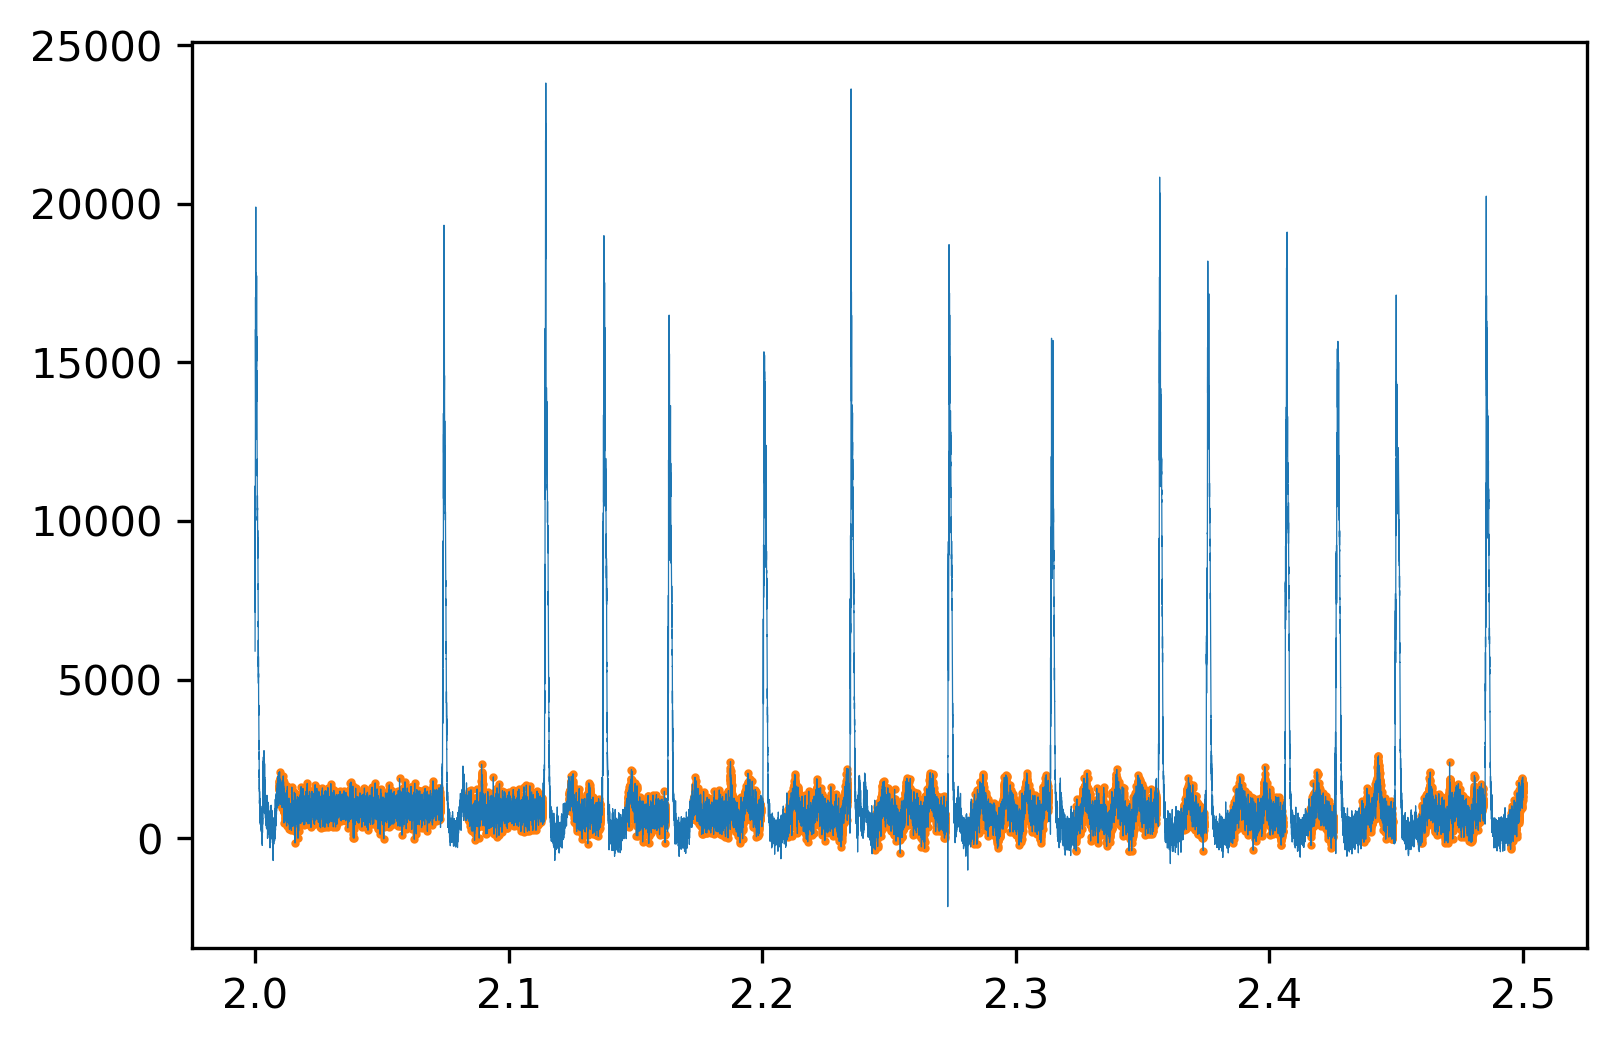

In [4]:
plt.figure(dpi=300)
plt.plot(soli.time, soli.data, lw=0.3)
plt.scatter(soli.time[elmmsk], soli.data[elmmsk], color='C1', marker='o', s=1)
plt.show()

## ddelmsync

In [5]:
import sys
sys.path.append('ipfnlite/')
sys.path.append('/afs/ipp/aug/ads-diags/common/python/lib/')
from getsig import getsig
from ddelmsync import ddelmsync
import matplotlib.pyplot as plt
#plt.style.use('./Styles/darklab.mplstyle')

In [6]:
shotnr = 30554
tBegin = 2.0
tEnd = 2.5
preft = 0.001
suft = 0.008

In [7]:
synctime, syncdata = ddelmsync(shotnr, 'MAC', 'Ipolsoli', tBegin=tBegin, tEnd=tEnd, preft=preft, suft=suft)

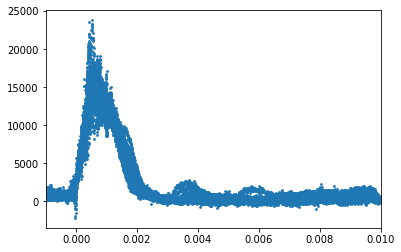

In [8]:
plt.scatter(synctime, syncdata, s=3)
plt.xlim(-0.001, 0.010)
plt.show()

Also works for signal groups, but you need to be careful if you're using scatter.

In [9]:
synctime, syncdata = ddelmsync(shotnr, 'RDL', 'LFSR', tBegin=tBegin, tEnd=tEnd, preft=preft, suft=suft)

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(err_txt, RuntimeWarning)


In [10]:
syncdata.shape

(162, 12)

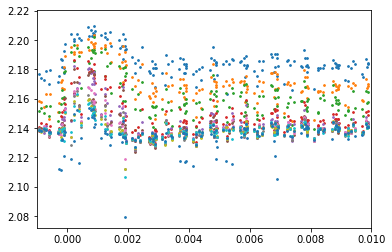

In [11]:
for i in range(len(syncdata[0,:])):
    plt.scatter(synctime, syncdata[:,i], s=3)
    
plt.xlim(-0.001, 0.010)
plt.show()